In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, RankVariantsDFGTr, RankVariantsSort2

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
class1 = [0.2, 0.01,50] #[mean, std, num_variants]
class2 = [0.22, 0.01,50]
#class3 = [0.15, 0.01,40]
#class4 = [0.18, 0.01,40]
#class5 = [0.14, 0.01,40]
classes = [class1, class2]

In [4]:
def create_experiments(classes):
    var = 0
    cfg = {}
    for mu, std, k in classes:
        for i in range(k):
            var_name = "alg{}".format(var)
            cfg[var_name] = [mu,std]
            var = var+1
    return cfg

In [5]:
cfg = create_experiments(classes)

In [6]:
h0 = list(cfg.keys())
random.shuffle(h0)

In [7]:
len(cfg)

100

In [8]:
ms = MeasurementsSimulator(cfg, 'normal',seed=159) 
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
rv = RankVariantsDFGTr(ms.get_alg_measurements(), h0)
#rv = RankVariantsSort2(ms.get_alg_measurements(), h0)

In [55]:
ms.measure(3,1)

In [56]:
#rv.sort_h0_by_iqr()

In [57]:
df = rv.rank_variants()

In [58]:
df

,case:concept:name,case:rank:q75-q25
0,alg39,0
1,alg24,0
2,alg14,0
3,alg48,0
4,alg18,0
...,...,...
95,alg97,1
96,alg90,1
97,alg96,1
98,alg73,1


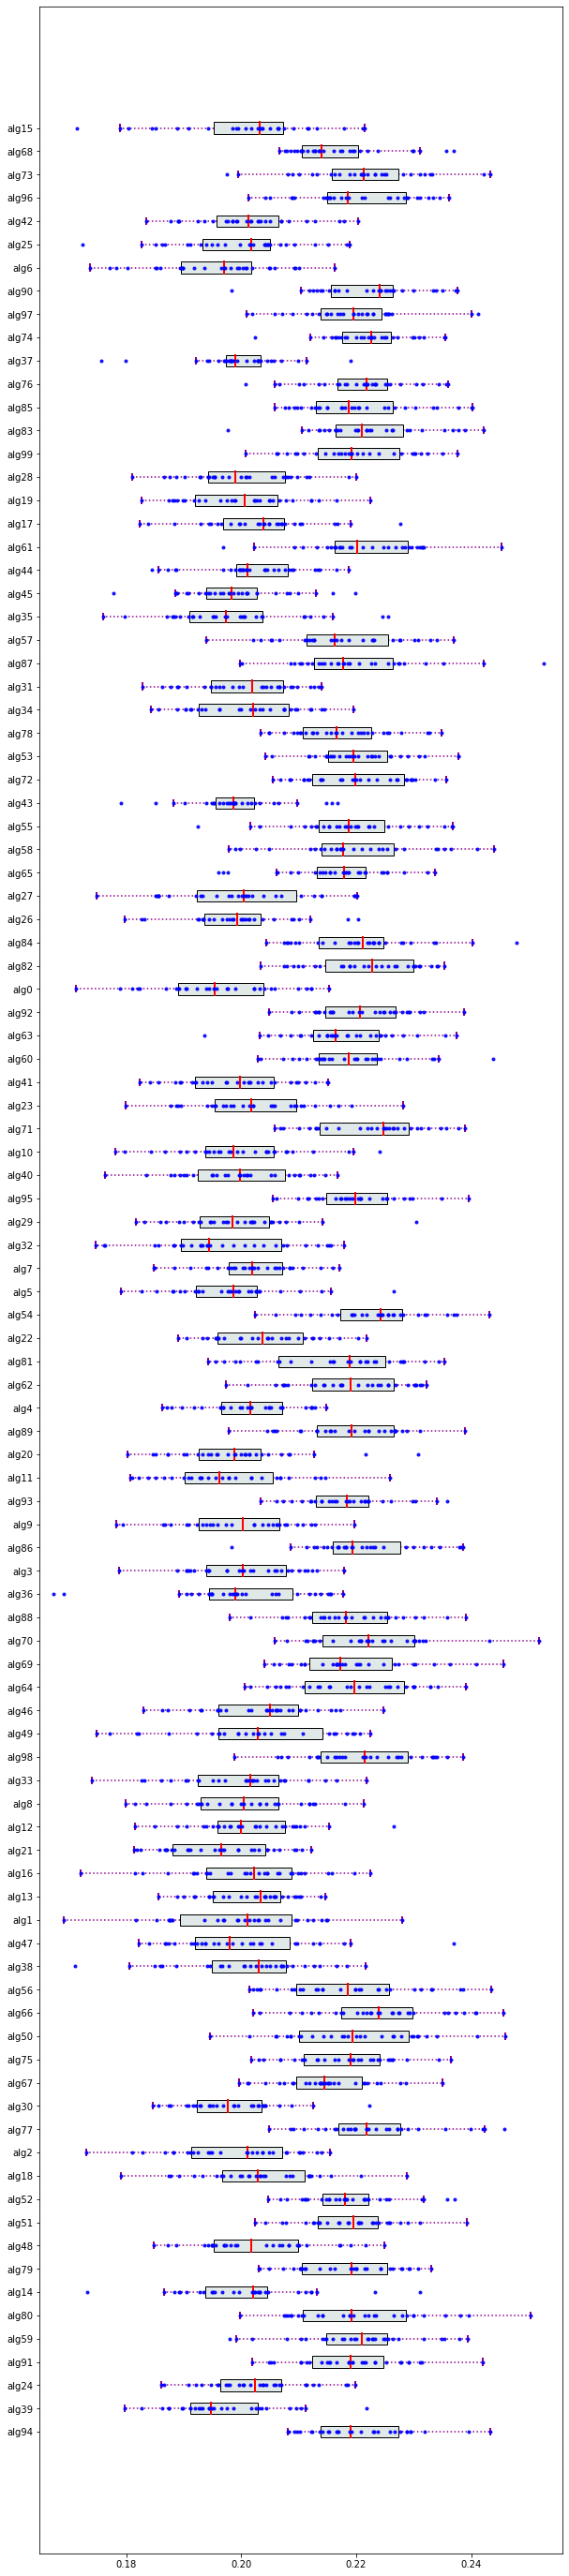

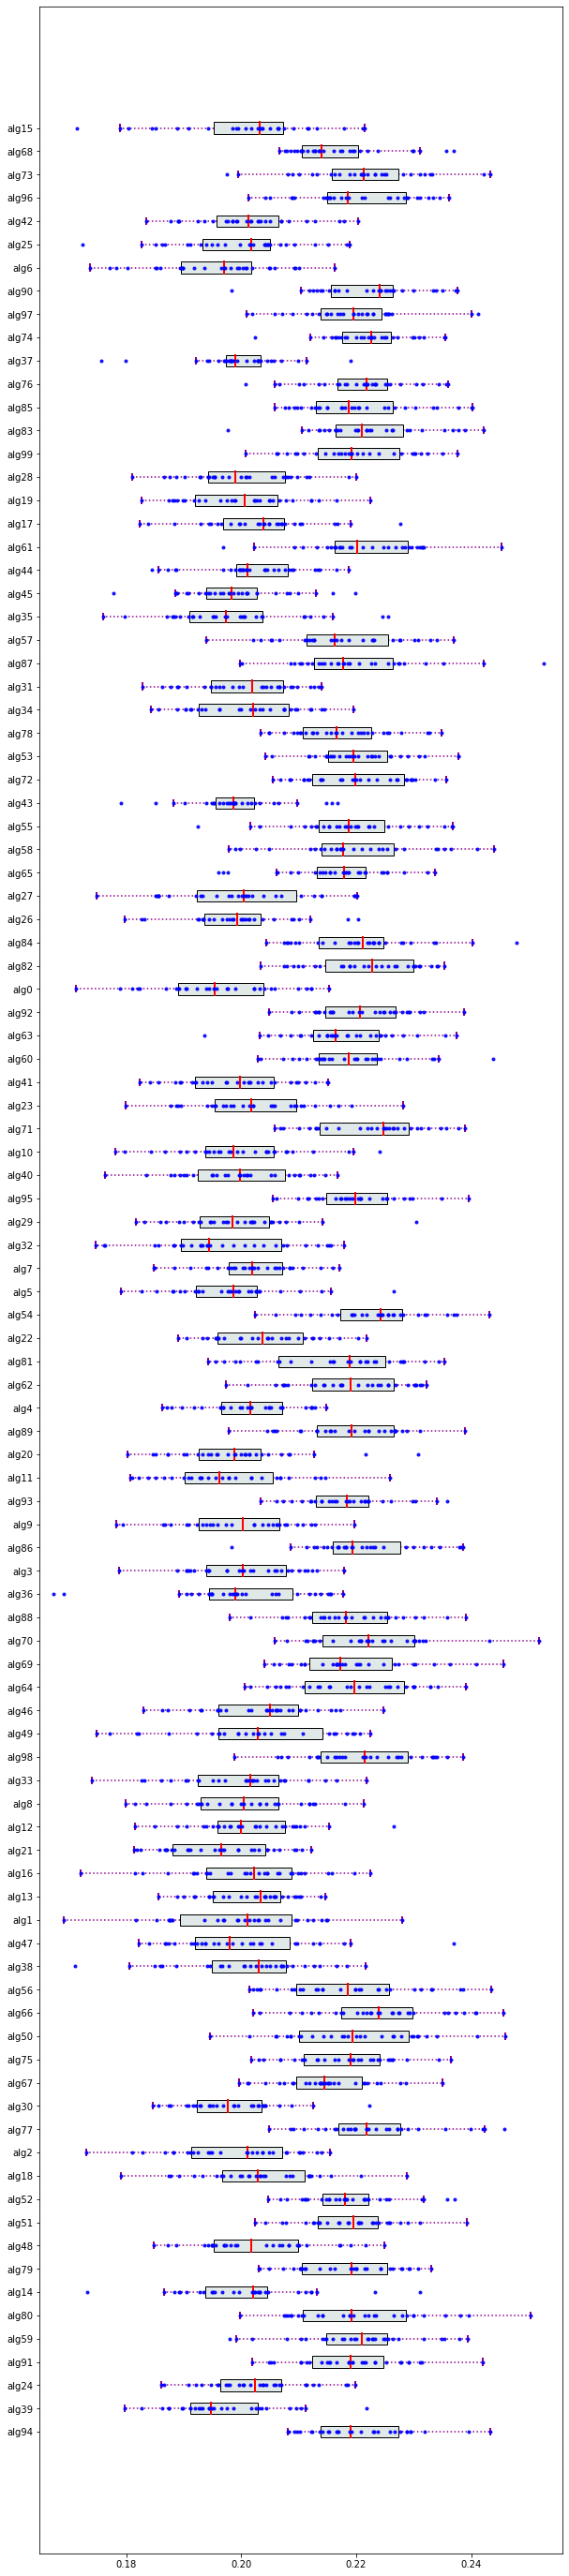

In [59]:
mv.show_measurements_boxplots(scale=0.5)

In [60]:
#df[df['case:concept:name']=='alg56']

In [61]:
rv.graph.graph_depth

1

In [62]:
rv.graph.transitivity_reduction()
rv.graph.graph_depth

1

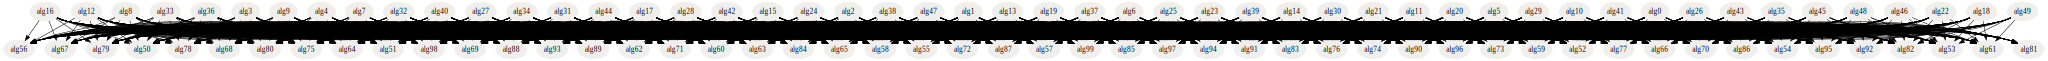

In [63]:

rv.graph.visualize()

In [64]:
print(rv.compare_algs.num_comparisons)
print(len(rv.compare_algs.measurements['alg0']))

4950
30


In [65]:
_, mr = rv.calculate_mean_rank()

In [66]:
mr

,case:concept:name,case:mean-rank
61,alg0,0.000
1,alg39,0.000
50,alg32,0.000
40,alg11,0.000
14,alg30,0.125
...,...,...
47,alg54,2.875
98,alg74,2.875
55,alg71,2.875
99,alg90,2.875
